##### Instance based or lazy learning - lazy algorithm

it uses the stored instances in the memory to find the possible **y**

###### Nearest Neighbour

For example if we have some observations with some target labels and we are try to find  the target value of new test  observation
The target value y_test will be equal to  the y(target) value of the observation which is near to the actual observation

- Find similar instance


# K - Nearest neighbour Algorithm

##### Training phase 

We will be saving the instances(examples)

##### Prediction time:

we will get test instance --- Find the training example which is near to the test instance

predict the observation output as output of test observation

Generalizing  we will be find the **K** nearest training examples

###### Classification problem:

We can simply predict the target value (predict the (most frequent)majority class from the available targets)

###### Regression problem:

Based on the target values y1 ,y2 ,y3 etc.., we will predict the average as the estimated 
output of the test instance

### **Voronoi diagram**  refer 
online

## Euclidean distance

##### to find the closeness b/w the points 
We will opt Euclidean distance - simple (Measuring squares of distance b/w 2 points and applying square root over them) points with smallest euclidean dist are preferred

How to find the closest points quickly at run time

We can give **equal weights** to the attributes
- when the scale of attributes  are similar
- when attributes have equal range and equal value

Assuming classes are spherical in shape

Consider some situations: where euclidean dist may create a problem

-  attribute is more imp than other 
-  attribute contains more noise than other

to over come this scenerios:
- user larger  K values
- `use weighted dist functions` - weighted Euclidean distance (search online)

### small K
- used to identify fine structure of problem space 
- or when data set is too smalle

### Large K
- to make sure that model is less sensitive to noise
- better probability estimates for discrete classes
- large datasets

types 
#### Distance weighted KNN

#### Locally weighted KNN (Uses Gaussian methodology)


#### There are chances that the attribuites which have less importance or not important may impact the actual target values

#### Feature Reduction :
used To over come this problems 

# Reason for  Feature reduction

Features contain information and `More information` leads to best discriminative power **which may not be true always**

 **Irrelavant features** In algorithms like KNN the **irrelavant features** leads introducing to NOISE
 
 **Redundant Features** which are not contributing information which may lead to degrradation in performance of learning algo (Especially when we have limited training examples and limited computing resources)
 
 **Curse of Dimensionality** A scenerio i.e when we have too many features (higher dimensions) which some times may lead to degradation of algorithm and more computational time
 

we need to improve accuracy or maintains accuracy reducing the complexity ----------------------------------------------



## Feature selection - 1st method of reduction




Getting subset for features

**Methods:** for **feature subset selection**
    - optimum methods
    - Heuristic methods
    - Randomised methods
    
**Evaluation**
 - unsupervised methods : Filter methods
 - Supervised methods   : Wrapper methods
 
 ### Need to find uncorrelated features
 
 
**Heuristic Algorithm**:
 
 - Forward selection Algorithm
     - start with empty feature set
     - Try each of the remaining features
     - Estimate class./Reg. error for addding each feature
     - **Select feature that gives more improvement**
     - Stop when no significant improvement
     
     
 

 
 - Backward selection ALgorithm
     - Start with complete feature set
     - Remove each feature everytime
     - Drop Feature with less impact
 
 
 
 

##### Selection

**Univariate** Looks at each feature independent of others
     - Pearson correlation coefficient (**r value is b/w +1 and -1** {r~0 means no correlation})
     - F-Score
     - Chi square
     - signal to Noise ratio (ratio of diff in means to diff in standard deviation {large value means Strong correlation})
**Rank features by importance**

**Ranking cut-off is determined by user**


**Multivariate Feature Selection** : considers all methods simultaneously(high value of w means Strong correlation)


## Feature Extraction : 2nd method of feature reduction

Mapping features from **N (higher dimension) and mapping to the M(lower dimension)** which leads to faster classification

## PCA
**Principal Components** 


https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c  - refer

# Code Implementation - Type 1

In [4]:
import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

##### Preparing Dataset

In [9]:
# We choose only the first two input feature dimensions viz sepal-length and sepal-width (both in cm) for ease of visualization.
iris = load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
y = iris.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

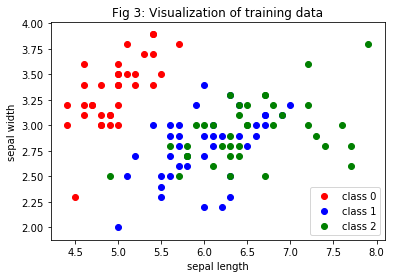

In [22]:
# number_of_samples = len(Y)

# #Splitting into training and test sets
# random_indices = np.random.permutation(number_of_samples)
# #Training set
# num_training_samples = int(number_of_samples*0.75)
# x_train = X[random_indices[:num_training_samples]]
# y_train = Y[random_indices[:num_training_samples]]
# #Test set
# x_test = X[random_indices[num_training_samples:]]
# y_test = Y[random_indices[num_training_samples:]]


# Visualisation
#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Visualization of training data')
plt.show()

K-nearest neighbour classifier algorithm
--------------------
Now that our training data is ready we will jump right into the classification task. Just to remind you, the K-nearest neighbor is a non-parametric learning algorithm and does not learn an parameterized function that maps the input to the output. Rather it looks up the training set every time it is asked to classify a point and finds out the K nearest neighbors of the query point. The class corresponding to majority of the points is output as the class of the query point.

In [24]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5) # K = 5
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Visualize the working of the algorithm
-------------------------------
Let's see how the algorithm works.
We choose the first point in the test set as our query point.

In [25]:
query_point = np.array([5.9,2.9])
true_class_of_query_point = 1
predicted_class_for_query_point = model.predict([query_point])
print("Query point: {}".format(query_point))
print("True class of query point: {}".format(true_class_of_query_point))

Query point: [5.9 2.9]
True class of query point: 1


###### Visualizing nearest neighbours



The query point is: [5.9 2.9]

The nearest neighbors of the query point are:
 [[6.  2.9]
 [5.9 3. ]
 [6.  3. ]
 [5.8 2.8]
 [6.1 2.9]
 [5.7 2.9]
 [6.1 3. ]
 [6.1 3. ]
 [6.1 2.8]
 [6.  2.7]]

The classes of the nearest neighbors are: [1 2 2 2 1 1 1 2 1 1]

Predicted class for query point: 2


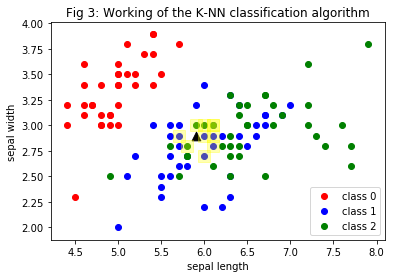

In [30]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors=10)
neighbors_object.fit(x_train)
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([query_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]
print("The query point is: {}\n".format(query_point))
print("The nearest neighbors of the query point are:\n {}\n".format(nearest_neighbors_of_query_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))
print("Predicted class for query point: {}".format(predicted_class_for_query_point[0]))

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.scatter(query_point[0], query_point[1],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='yellow',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 3: Working of the K-NN classification algorithm')
plt.show()

In [28]:
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage

In [29]:
#Evaluate the performances on the validation and test sets
print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model, x_test, y_test)
print('test misclassification percentage = {}%'.format(test_err))


Evaluating K-NN classifier:
test misclassification percentage = 15.789473684210527%


# Principal Component Analysis

In [31]:
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/dsxuser/scikit_learn_data


In [32]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {},\nNumber of output classes: {}\n".format(n_samples,height,
                                        width,n_features,n_classes))

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



In [34]:
# Split into a training set (75%) and a test set (25%) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

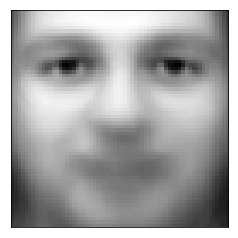

In [39]:
mean_image = np.mean(X_train,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
mean_image.shape

(4096,)

Make a function for visualization of the images as an album
-----------------------------------------------------------

In [55]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


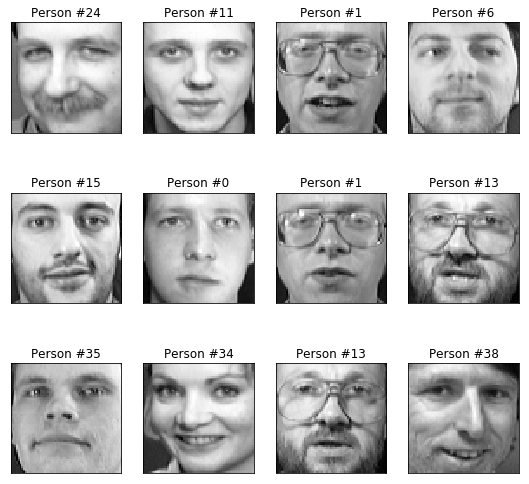

In [57]:
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images, height, width, titles)

Calculate a set of eigen-faces 
-----------------------------
We find the eigen vectors corresponding to the biggest eigen values of the covariance matrix of the data. These eigen vectors are the directions along which the data shows maximum amount of variation. Each eigen vector can be considered as an eigen face. We can represent any image in the dataset as a linear combination of these eigen faces with minimum error. 

In [58]:
#Reduce the dimensionality of the feature space
n_components = 150

#Finding the top n_components principal components in the data
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))


In [61]:
eigenfaces.shape

(150, 64, 64)

### Eigen faces visualisation

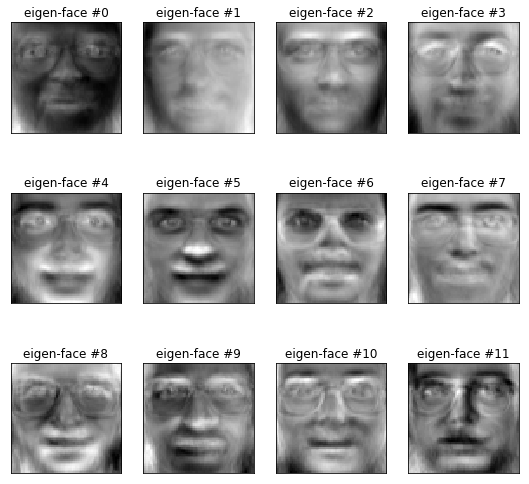

In [59]:
titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [62]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


In [63]:
X_train.shape


(300, 4096)

Use a KNN-Classifier in this transformed space to identify the faces
------------------------------------------